#Veri Yükleme

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


# Veri Ön İşleme

In [ ]:
df.isnull().sum()# boş verileri görüntüledik

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df = df.dropna() #boş verileri veri setinden çıkardık

In [ ]:
# Benzer isimli verileri birleştirerek özellikleri azaltıcaz
# Kid home ve Teen home Çocuk sayısı olarak birleştirilir.
# MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts ve MntGoldProds değerlerini Harcamalar adı altında birleştiriyoruz.
# Son olarak medeni durumu evli yalnız olarak binary hale çeviriyoruz

df['Total_kids']= df['Kidhome'] + df['Teenhome']

df['Spending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df['Age'] = 2021 - df.Year_Birth

In [ ]:
X = df.drop(['ID', 'Year_Birth','Kidhome','Education', 'Marital_Status',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'], axis=1)# gereksiz bilgileri çıkararak    

In [ ]:
X.head()

,Income,Total_kids,Spending,Age
0,58138.0,0,1617,64
1,46344.0,2,27,67
2,71613.0,0,776,56
3,26646.0,1,53,37
4,58293.0,1,422,40


# Feature Selection

## Variance Threshold

In [ ]:
#Min Max Scaler
df_copy = df.drop(['ID','Education', 'Marital_Status','Teenhome', 'Dt_Customer'], axis=1)# gereksiz bilgileri çıkararak    

df_copy.head()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_kids,Spending,Age
0,1957,58138.0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,0,1617,64
1,1954,46344.0,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,2,27,67
2,1965,71613.0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,0,776,56
3,1984,26646.0,1,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,1,53,37
4,1981,58293.0,1,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,1,422,40


In [ ]:
scaler = MinMaxScaler()#min max scaler yaparak model eğitiminde performans iyileştirmek için değerleri 0 ile 1 arasını sabitleriz
df_copy_rescaled = scaler.fit_transform(df_copy)
df_copy_rescaled = pd.DataFrame(df_copy_rescaled, columns=df_copy.columns)#sabitlenen değerleri tekrar dataframe'e çeviriyoruz
df_copy_rescaled.head()

,Year_Birth,Income,Kidhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Total_kids,Spending,Age
0,0.621359,0.084832,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.200000,0.296296,0.357143,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.639683,0.378641
1,0.592233,0.067095,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.133333,0.037037,0.035714,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666667,0.008730,0.407767
2,0.699029,0.105097,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.066667,0.296296,0.071429,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.305952,0.300971
3,0.883495,0.037471,0.5,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.133333,0.074074,0.000000,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.019048,0.116505
4,0.854369,0.085065,0.5,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.333333,0.185185,0.107143,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.165476,0.145631


In [ ]:
parameters = [0.01,0.02,0.03,0.04,0.05,0.06]

In [ ]:
 for threshold in parameters:
  sel = VarianceThreshold(threshold=(threshold))#0 ile 1 arasına getirilen verisetini 27 öznitelikten 0.06 threshold ile birlikte 8 adete kadar indiriyorux
  print(sel.fit_transform(df_copy_rescaled).shape)


(2216, 23)
(2216, 15)
(2216, 13)
(2216, 12)
(2216, 11)
(2216, 8)


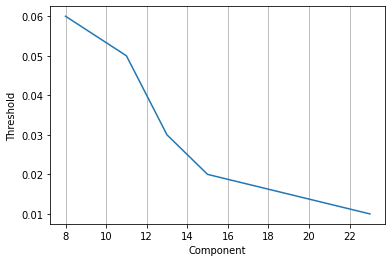

In [ ]:
fig, ax = plt.subplots()

x = np.array([23,15,13,12,11,8])
y = np.array(parameters)
plt.plot(x, y)

plt.xlabel('Component')
plt.ylabel('Threshold')

ax.grid(axis='x')
plt.show()

In [ ]:
vat_data = sel.fit_transform(df_copy_rescaled)
pd.DataFrame(vat_data).head()

,0,1,2,3,4,5,6,7
0,0.0,0.585859,0.307692,0.0,0.0,0.0,1.0,0.000000
1,0.5,0.383838,0.153846,0.0,0.0,0.0,0.0,0.666667
2,0.0,0.262626,0.769231,0.0,0.0,0.0,0.0,0.000000
3,0.5,0.262626,0.307692,0.0,0.0,0.0,0.0,0.333333
4,0.5,0.949495,0.461538,0.0,0.0,0.0,0.0,0.333333


## PCA

In [ ]:
from sklearn.decomposition import PCA 

In [ ]:
# component sayısını direkt vermek mantıklı olmacağından dolayı varyans değerini 0.85 - 0.99 arasında tutmak isteriz 
#bundan dolayı varyans değerini veriyoruz
pca = PCA(n_components=0.86, svd_solver='full')
pca_data = pca.fit_transform(df_copy_rescaled)

In [ ]:
pca_data.shape#diğer bi feature selection işleminde olduğu gibi 27 değerden 10 tanesi seçiliyor

(2216, 10)

In [ ]:
pd.DataFrame(pca_data).head()

,0,1,2,3,4,5,6,7,8,9
0,0.868466,0.324434,-0.267969,0.320679,-0.022873,-0.622623,-0.196529,0.055417,0.146454,0.309224
1,-0.646666,0.101588,0.025589,-0.124849,0.082901,0.010276,0.126518,0.004407,-0.104942,0.257019
2,0.340576,-0.331060,-0.364554,-0.159559,-0.055256,0.031055,-0.050669,0.021005,0.028384,-0.063123
3,-0.505303,0.083209,-0.137825,-0.157117,-0.073977,0.041296,0.190156,-0.039779,0.127602,-0.165892
4,-0.246838,-0.225802,0.265163,0.288271,0.098855,-0.209110,0.082433,-0.014920,0.157135,-0.152932


### PCA Görselleştirme

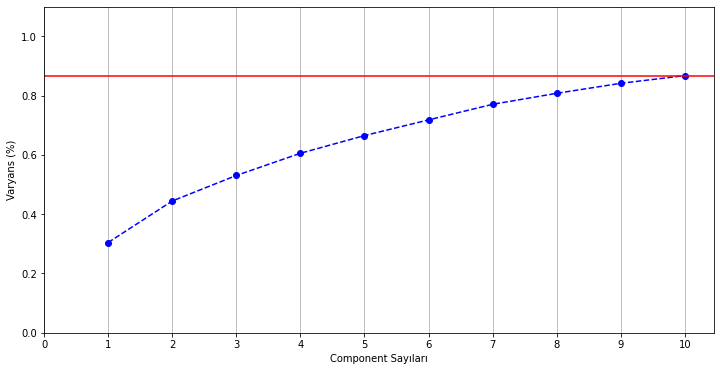

In [ ]:
#her bir componentta varyans değerinin grafiği
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Component Sayıları')
plt.xticks(np.arange(0, 11, step=1))
plt.ylabel('Varyans (%)')

plt.axhline(y=np.sum(pca.explained_variance_ratio_), color='r', linestyle='-')

ax.grid(axis='x')
plt.show()

#K-means

## K-means Model Eğitimi

In [ ]:
parameters = {'n_clusters' : [clusters for clusters in range(3,15,2)], 'init' : ['k-means++', 'random'],
              'max_iter' : [iter for iter in range(100, 1000, 100)], 'random_state' : [42]}

kmeans = KMeans()

clst = GridSearchCV(kmeans, parameters)

n_clusters : Oluşturulacak merkez sayısıdır bu değer kadar küme sayısı vardır.

init : 
  k-means++ (Yakınsamayı hızlandırmak için k-mean kümelemede ilk küme merkezlerini algoritmik şekilde seçer)
  random (Küme merkezlerini rastgele şekilde seçer)

max_iter: Tek bir çalıştırmada k-means algoritmasının maksimum yineleme sayısı.

random_state: rastgele sayı üretimini belirtir

In [ ]:
clst.fit(X)# Verilerimizi modele fit ettik 

GridSearchCV(estimator=KMeans(),
             param_grid={'init': ['k-means++', 'random'],
                         'max_iter': [100, 200, 300, 400, 500, 600, 700, 800,
                                      900],
                         'n_clusters': [3, 5, 7, 9, 11, 13],
                         'random_state': [42]})

In [ ]:
clst.best_params_# en iyi parametreler

{'init': 'k-means++', 'max_iter': 100, 'n_clusters': 13, 'random_state': 42}

In [ ]:
preds = clst.predict(X)#Aynı şekilde eğitilen modeli kümelere ayırarak tahmin değerlerini aldık  

In [ ]:
segmented_customers = X.copy() #segmentlere ayrılan müşterileri alarak 
segmented_customers['Clusters'] = preds
df['Clusters'] = preds #veri setimize yazdırdık.

In [ ]:
segmented_customers.head()# segmentlere ayrılmış veriseti

,Income,Total_kids,Spending,Age,Clusters
0,58138.0,0,1617,64,5
1,46344.0,2,27,67,1
2,71613.0,0,776,56,0
3,26646.0,1,53,37,11
4,58293.0,1,422,40,5


## K-means Sonucu

Text(0.5, 1.0, 'Kümelerin Dağılımı')

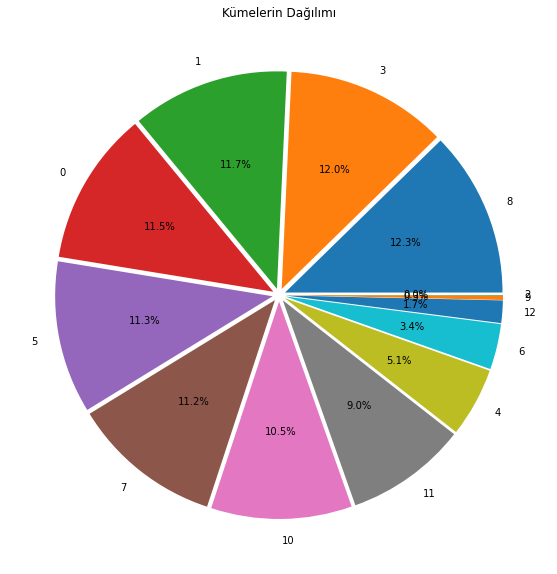

In [ ]:
cluster_count= segmented_customers['Clusters'].value_counts() #kümelerin değerlerini atadık

plt.figure(figsize=(20,10))
plt.pie(cluster_count, labels= cluster_count.index, explode=tuple(np.linspace(0.03,0.03,clst.best_params_['n_clusters'])), autopct='%1.1f%%')
plt.title('Kümelerin Dağılımı')

Text(0, 0.5, 'Harcama - Spending')

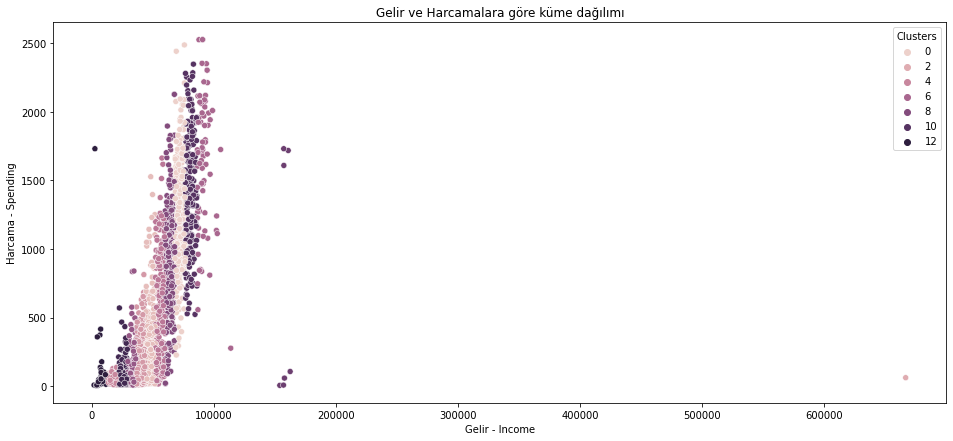

In [ ]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=segmented_customers, y='Spending', x='Income', hue='Clusters')
plt.title('Gelir ve Harcamalara göre küme dağılımı')
plt.xlabel('Gelir - Income')
plt.ylabel('Harcama - Spending')

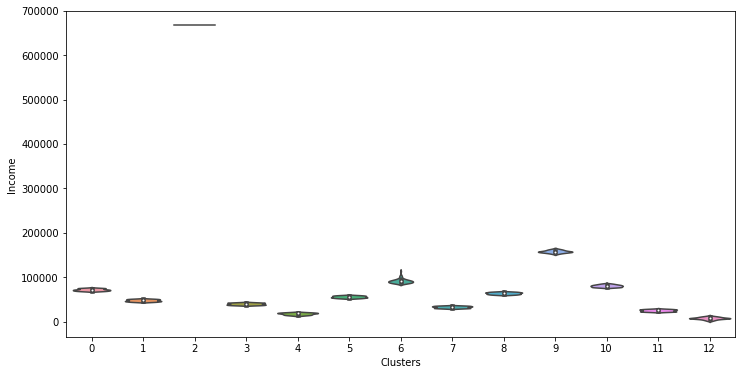

In [ ]:
# Gelirin Kümelere göre Dağılımı
sns.violinplot(data=segmented_customers, y= 'Income', x= 'Clusters')

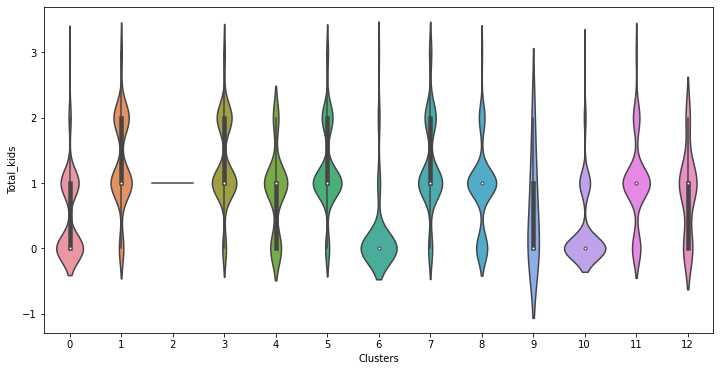

In [ ]:
# Çocuk sayısının Kümelere göre Dağılımı
sns.violinplot(data=segmented_customers, y= 'Total_kids', x= 'Clusters')

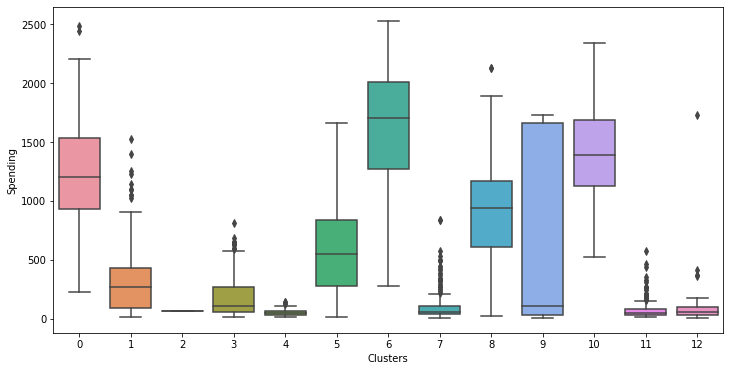

In [ ]:
# Harcamanın Kümelere göre Dağılımı
sns.boxplot(data=segmented_customers, y= 'Spending', x= 'Clusters')

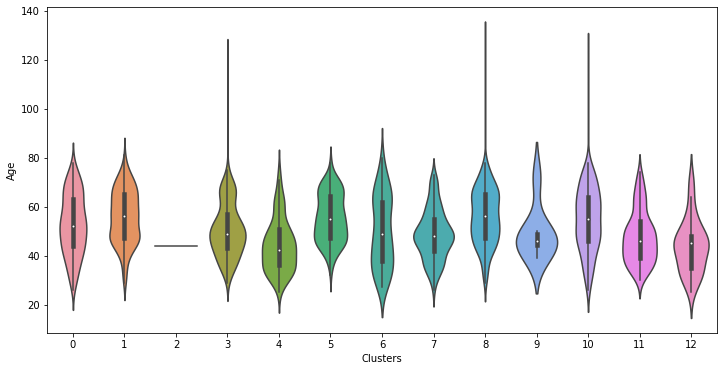

In [ ]:
# Yaşın Kümelere göre Dağılımı
sns.violinplot(data=segmented_customers, y= 'Age', x= 'Clusters')

#Hiyerarşik Kümeleme

##Hiyerarşik Kümeleme Model Eğitimi

In [ ]:
parameters = {'n_clusters': [neighbors for neighbors in range(5,25,2)], 'affinity': ['euclidean','manhattan','l1','l2'], 'linkage': ['ward', 'complete', 'average', 'single']}

hc = AgglomerativeClustering()

#agcl = GridSearchCV(hc, parameters) #girdsearch ile birlikte score sorduğundan dolayı her score'u denememize rağmen çalışmadı

clusters = 5

agcl = AgglomerativeClustering(n_clusters = clusters, affinity= "euclidean", linkage = "ward" )

n_clusters : Bulunacak küme sayısı

affinity : Bağlantıyı hesaplamak için kullanılan metrik.

linkage : Hangi bağlantı kriterinin kullanılacağı. Bağlantı kriteri gözlem kümeleri arasında hangi mesafenin kullanılacağını belirler.

In [ ]:
agcl.fit(X)

AgglomerativeClustering(n_clusters=5)

In [ ]:
agcl.labels_

array([3, 4, 3, ..., 3, 3, 4])

In [ ]:
segmented_customers = X.copy() #segmentlere ayrılan müşterileri alarak 
segmented_customers['Clusters'] = agcl.labels_
df['Clusters'] = agcl.labels_ #veri setimize yazdırdık.

In [ ]:
segmented_customers.head()

,Income,Total_kids,Spending,Age,Clusters
0,58138.0,0,1617,64,3
1,46344.0,2,27,67,4
2,71613.0,0,776,56,3
3,26646.0,1,53,37,1
4,58293.0,1,422,40,3


##Hiyerarşik Kümeleme Sonucu

Text(0.5, 1.0, 'Kümelerin Dağılımı')

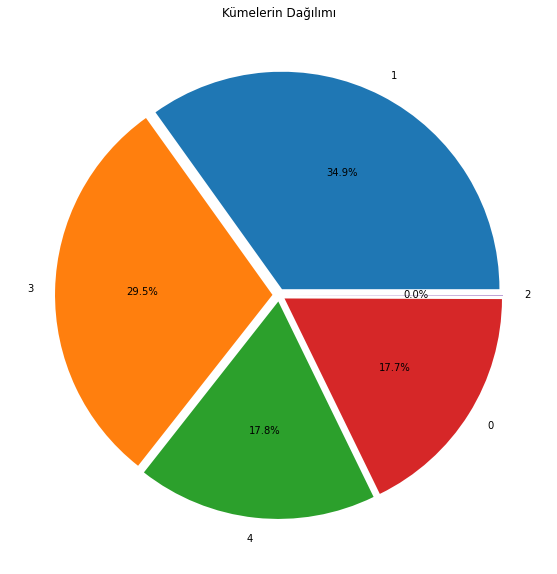

In [ ]:
cluster_count= segmented_customers['Clusters'].value_counts() #kümelerin değerlerini atadık

plt.figure(figsize=(20,10))
plt.pie(cluster_count, labels= cluster_count.index, explode=tuple(np.linspace(0.03,0.03,clusters)), autopct='%1.1f%%')
plt.title('Kümelerin Dağılımı')

Text(0, 0.5, 'Harcama - Spending')

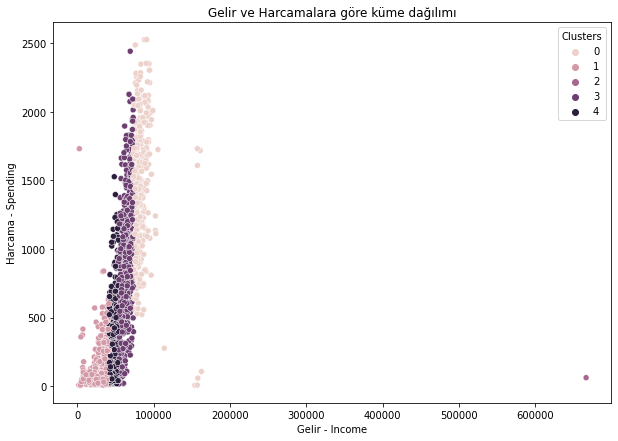

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=segmented_customers, y='Spending', x='Income', hue='Clusters')
plt.title('Gelir ve Harcamalara göre küme dağılımı')
plt.xlabel('Gelir - Income')
plt.ylabel('Harcama - Spending')

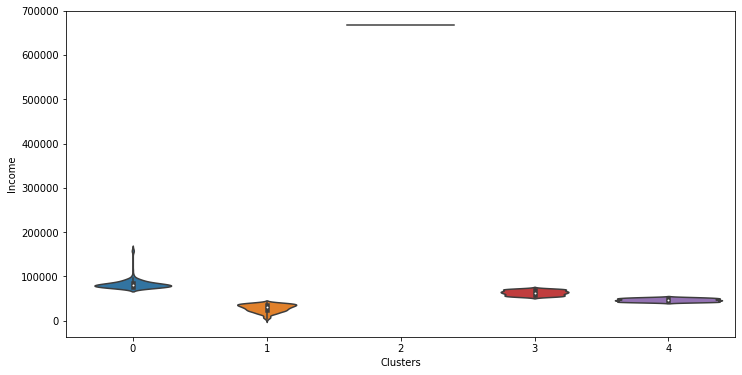

In [ ]:
# Gelirin Kümelere göre Dağılımı
sns.violinplot(data=segmented_customers, y= 'Income', x= 'Clusters')

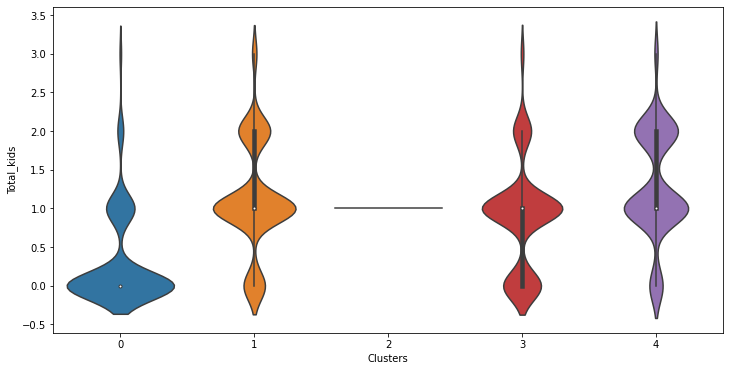

In [ ]:
# Çocuk Sayısının Kümelere göre Dağılımı
sns.violinplot(data=segmented_customers, y= 'Total_kids', x= 'Clusters')

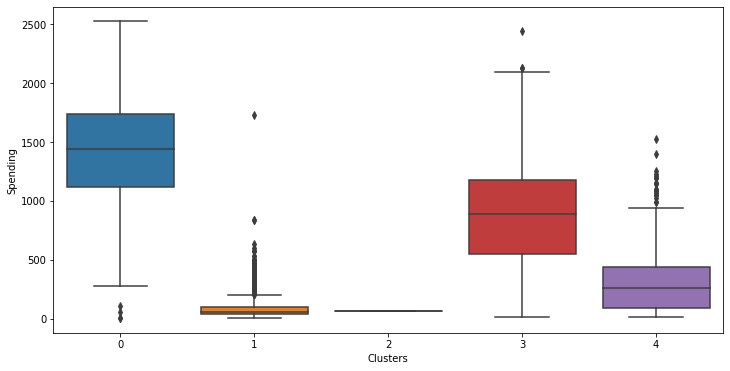

In [ ]:
# Harcamanın Kümelere göre Dağılımı
sns.boxplot(data=segmented_customers, y= 'Spending', x= 'Clusters')

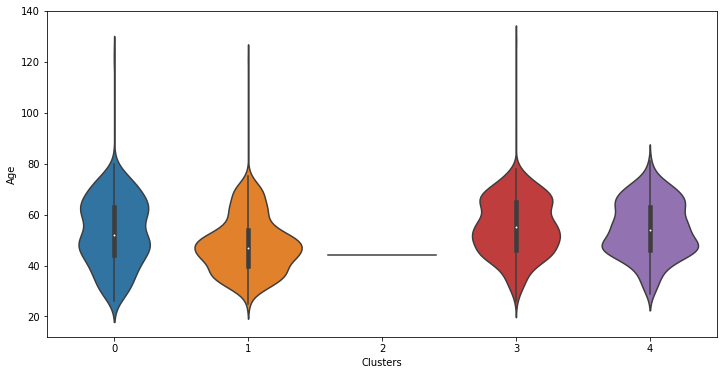

In [ ]:
# Yaşın Kümelere göre Dağılımı
sns.violinplot(data=segmented_customers, y= 'Age', x= 'Clusters')

# Son Model

In [ ]:
model = KMeans(init= 'k-means++', max_iter = 100, n_clusters= 13, random_state= 42)
variance = VarianceThreshold(threshold=(0.6)) #Belirlenen en iyi threshold ile birlikte en iyi k-means modeli ile eğitilerek 13 sınıf oluşturulmuştur

In [ ]:
X = sel.fit_transform(df_copy_rescaled)
X = pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7
0,0.0,0.585859,0.307692,0.0,0.0,0.0,1.0,0.000000
1,0.5,0.383838,0.153846,0.0,0.0,0.0,0.0,0.666667
2,0.0,0.262626,0.769231,0.0,0.0,0.0,0.0,0.000000
3,0.5,0.262626,0.307692,0.0,0.0,0.0,0.0,0.333333
4,0.5,0.949495,0.461538,0.0,0.0,0.0,0.0,0.333333


In [ ]:
model.fit(X)

KMeans(max_iter=100, n_clusters=13, random_state=42)

In [ ]:
preds = model.predict(X)

In [ ]:
segmented_customers = X.copy() 
segmented_customers['Clusters'] = preds
df['Clusters'] = preds 

In [ ]:
segmented_customers.head()# segmentlere ayrılmış veriseti

,0,1,2,3,4,5,6,7,Clusters
0,0.0,0.585859,0.307692,0.0,0.0,0.0,1.0,0.000000,2
1,0.5,0.383838,0.153846,0.0,0.0,0.0,0.0,0.666667,1
2,0.0,0.262626,0.769231,0.0,0.0,0.0,0.0,0.000000,0
3,0.5,0.262626,0.307692,0.0,0.0,0.0,0.0,0.333333,12
4,0.5,0.949495,0.461538,0.0,0.0,0.0,0.0,0.333333,9


## Grafik

Text(0.5, 1.0, 'Kümelerin Dağılımı')

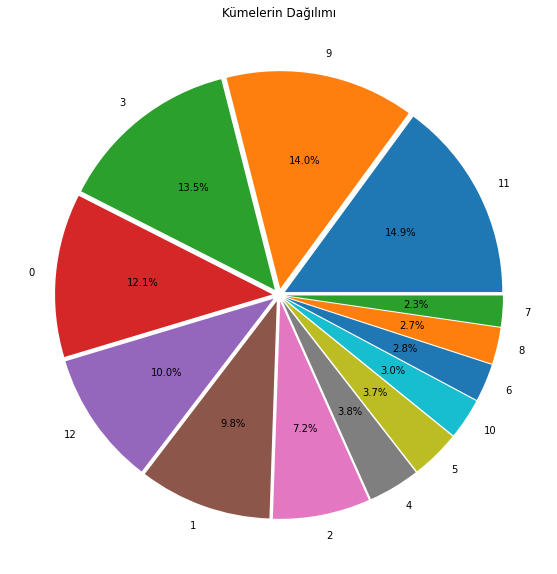

In [ ]:
cluster_count= segmented_customers['Clusters'].value_counts() 

plt.figure(figsize=(20,10))
plt.pie(cluster_count, labels= cluster_count.index, explode=tuple(np.linspace(0.03,0.03, np.unique(preds).shape[0])), autopct='%1.1f%%')
plt.title('Kümelerin Dağılımı')